In [51]:
#Required imports
import pandas as pd
#Load the Google Form Responses
df = pd.read_csv("Untitled form (Responses) - Form Responses 1.csv")

#Preview the data
df = df.drop(columns=["Timestamp"] , errors="ignore")
df = df.drop(columns=["Email Address"] , errors="ignore")
df.head()

,Have you ever worked/ studied at home in front of a computer screen?(Any type of a digital screen ex: mobile phone/laptop/tab),"Do you agree with the fact that ""Technology makes communication easier""?",Have you felt it should be continued?,Why do you choose communicating with others via computer screens rather than meet them in person and talk? You can select any number of choices.,"Have you felt it hard to express your feelings, ideas and thoughts in a few text messages?",Do you feel socially awkward when you meet up with people physically?,What are the difficulties you face in talking with someone when you meet them face-to-face after depending on computer screens for the main means of communication? Select relevant ones.,How does getting accustomed to use computer screens as a mode of talking to others affect your social skills? Select any number of choices.,Do you wear spectacles due to staring at your computer/laptop/mobile phone/tab for long hours?,Have you ever visited the doctor because of chronic backaches or weak eyesight due to staring at digital screens for long hours?,Have you ever noticed any kind of symptoms in your body & mind due to depending on computer screens? (Even a tiny ache or pain),"If it is 'Yes', choose relevant ones.","Finally, do you think an individual needs to socialize with others physically in order to present himself/herself confidently & express their thoughts & opinions to the members of the public?",Kindly give your opinion whether an individual should rely on computer screens for the main means of communication or he/she should meet people in person and talk.,Give reasons for your opinion as well.
0,Yes,Agree,Yes,"Cost effectiveness, Flexibility, Increased eff...",Yes,Yes,Feeling forced to say things you don't really ...,Difficulty to place your trust in new people i...,Yes,Yes,Yes,"Dry eyes or watery eyes, Blurry vision, Increa...",Yes,Should rely on computer screens for the main m...,I think both can get
1,Yes,Strongly agree,Yes,"Flexibility, Easy accessibility / Convenience",Yes,Yes,Unfair advantages (disadvantages) of reacting ...,"Poor self-esteem / Lack of confidence, Difficu...",No,No,Yes,Headaches,Yes,Should meet people in person and talk,.
2,Yes,Agree,Yes,"Cost effectiveness, Increased efficiency & pro...",Yes,Yes,Holding the conversation without an interest j...,"Poor self-esteem / Lack of confidence, Lack of...",Yes,No,Yes,"Eye discomfort & fatigue, Dry eyes or watery e...",Yes,Should meet people in person and talk,It's better to meet people and communicate wit...
3,Yes,Agree,Yes,Easy accessibility / Convenience,Yes,No,Unfair advantages (disadvantages) of reacting ...,"Poor self-esteem / Lack of confidence, Lack of...",No,No,No,Headaches,Yes,Should meet people in person and talk,Communicating with people through face to face...
4,Yes,Agree,Yes,"Cost effectiveness, Constant connectivity",Yes,Yes,Holding the conversation without an interest j...,"Poor self-esteem / Lack of confidence, Difficu...",No,No,Yes,Headaches,No,Should meet people in person and talk,"Well, I think that they both should go hand to..."


In [52]:
#Check column names
df.columns = [
    "screen_experience", #Q1
    "tech_makes_com_easier", #Q2
    "continue_screen_com", #Q3
    "reasons_screen_com", #Q4(multi-select)
    "difficulty_text_expression", #Q5
    "social_awkwardness", #Q6
    "face_to_face_difficulties", #Q7(multi-select)
    "social_skill_impact", #Q8(multi-select)
    "wear_spectacles", #Q9
    "doctor_visit", #Q10
    "noticed_symptoms", #Q11
    "symptoms_types", #Q12(multi-select)
    "need_physical_socializing", #Q13
    "preferred_com_mode", #Q14
    "reason_for_preference" #Q15(open-ended)
]

df.info()

#Column Renaming: Long Google Form question texts were replaced with concise, meaningful variable names to improve readability, reproducibility, and analytical clarity.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   screen_experience           38 non-null     object
 1   tech_makes_com_easier       38 non-null     object
 2   continue_screen_com         38 non-null     object
 3   reasons_screen_com          38 non-null     object
 4   difficulty_text_expression  38 non-null     object
 5   social_awkwardness          38 non-null     object
 6   face_to_face_difficulties   38 non-null     object
 7   social_skill_impact         38 non-null     object
 8   wear_spectacles             38 non-null     object
 9   doctor_visit                38 non-null     object
 10  noticed_symptoms            38 non-null     object
 11  symptoms_types              38 non-null     object
 12  need_physical_socializing   38 non-null     object
 13  preferred_com_mode          38 non-null     object
 

In [54]:
#Required imports
import pandas as pd
import matplotlib.pyplot as plt
df.describe(include="all")       #Descriptive Statistics(Overview) #This satisfies "Descriptive statistics" in the guidelines 



,screen_experience,tech_makes_com_easier,continue_screen_com,reasons_screen_com,difficulty_text_expression,social_awkwardness,face_to_face_difficulties,social_skill_impact,wear_spectacles,doctor_visit,noticed_symptoms,symptoms_types,need_physical_socializing,preferred_com_mode,reason_for_preference
count,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38
unique,2,4,2,14,2,2,14,21,2,2,2,31,2,2,36
top,Yes,Agree,Yes,Easy accessibility / Convenience,Yes,No,Having a hard time understanding what others f...,Difficulty to place your trust in new people i...,No,No,Yes,Headaches,Yes,Should meet people in person and talk,.
freq,37,20,36,14,35,21,9,6,22,28,35,6,34,27,3


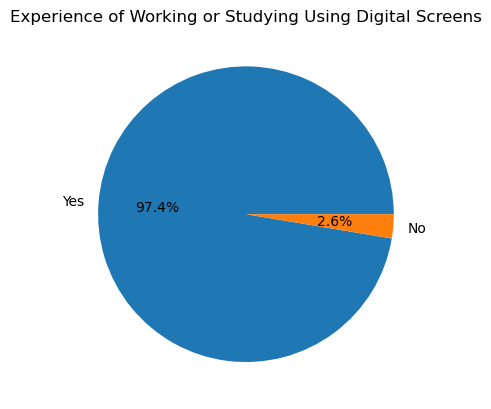

In [24]:
#Screen Experience(Q1) - Pie Chart
df["screen_experience"].value_counts().plot.pie(autopct="%1.1f%%")
plt.title("Experience of Working or Studying Using Digital Screens")
plt.ylabel("")
plt.show()

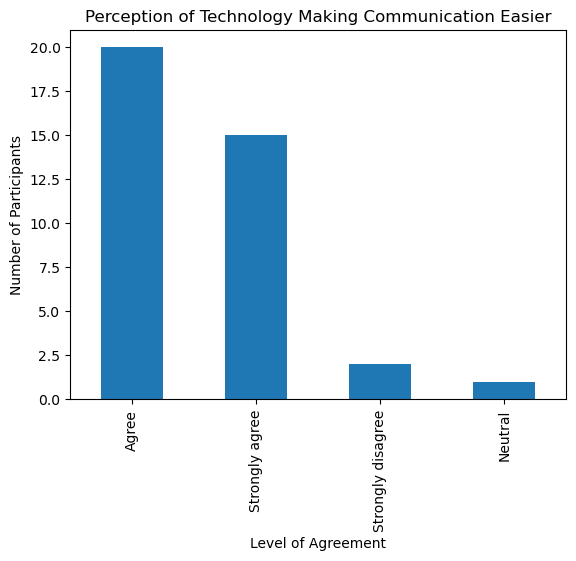

In [25]:
#Technology makes communication easier(Q2) - Bar Chart        #Better for Likert-type questions
df["tech_makes_com_easier"].value_counts().plot.bar()
plt.title("Perception of Technology Making Communication Easier")
plt.xlabel("Level of Agreement")
plt.ylabel("Number of Participants")
plt.show()

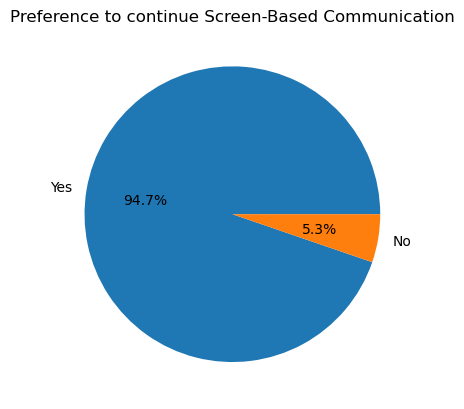

In [26]:
#Preference to continue screen communication(Q3)
df["continue_screen_com"].value_counts().plot.pie(autopct="%1.1f%%")
plt.title("Preference to continue Screen-Based Communication")
plt.ylabel("")
plt.show()

In [43]:
def clean_multiselect(series):
    return (
        series
        .dropna()
        .str.split(",")
        .explode()
        .str.strip()
        .str.lower()
    )

#Multi-select survey responses were normalized by trimming whitespace and standardizing text case to prevent category duplication during frequency analysis.
#Removed duplicates caused by formatting
#Made categories consistent

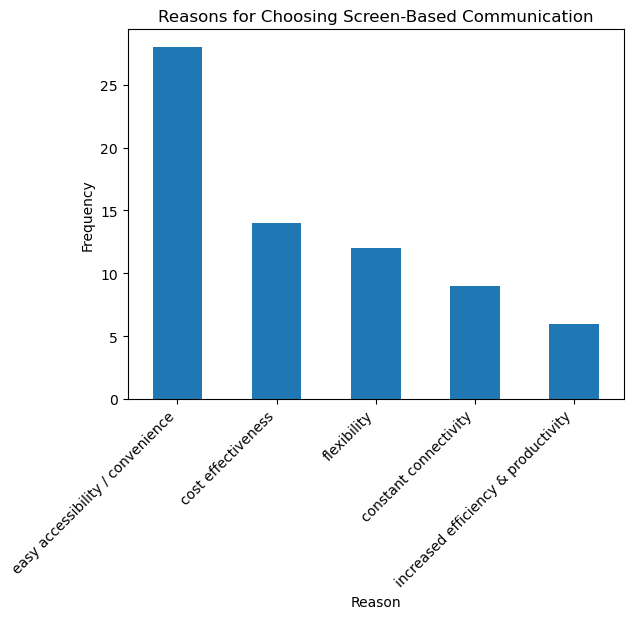

In [44]:
#Reasons for screen-based communication(Q4) (multi-select)
reasons=clean_multiselect(df["reasons_screen_com"])
reasons.value_counts().plot.bar()
plt.title("Reasons for Choosing Screen-Based Communication")
plt.xlabel("Reason")
plt.ylabel("Frequency")
plt.xticks(rotation=45, ha="right")
plt.show()

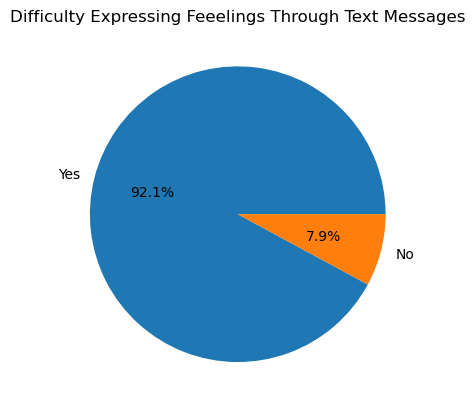

In [28]:
df["difficulty_text_expression"].value_counts().plot.pie(autopct="%1.1f%%")
plt.title("Difficulty Expressing Feeelings Through Text Messages")
plt.ylabel("")
plt.show()

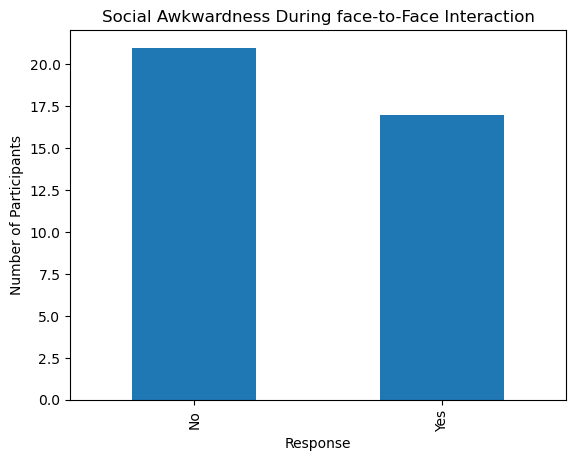

In [29]:
#Social Awkwardness in face-to-face meetings(Q6)
df["social_awkwardness"].value_counts().plot.bar()
plt.title("Social Awkwardness During face-to-Face Interaction")
plt.xlabel("Response")
plt.ylabel("Number of Participants")
plt.show()

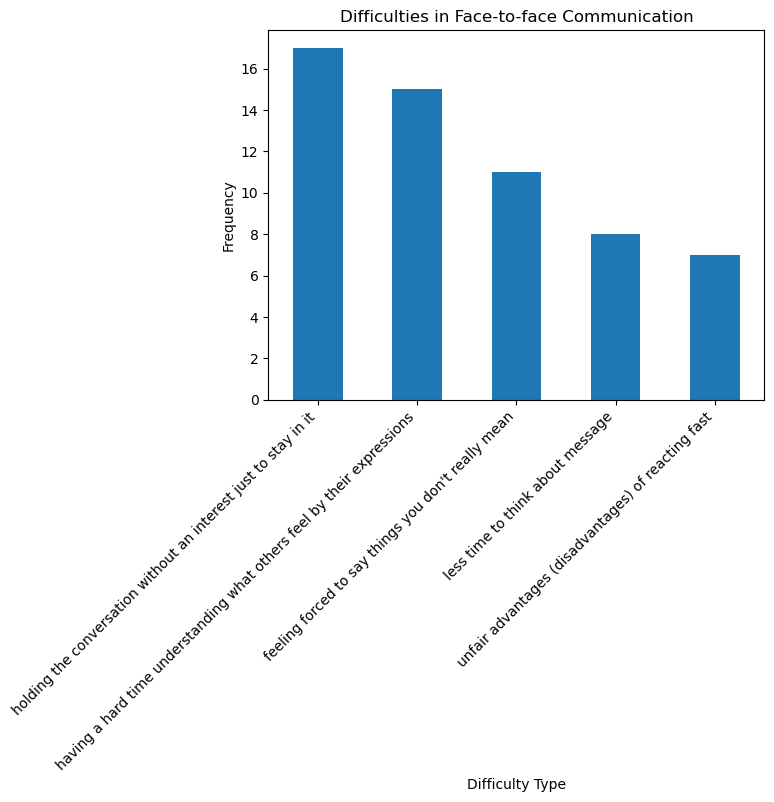

In [46]:
#Face-to-face communication difficulties(Q7) (multi-select)
ftf_diff=clean_multiselect(df["face_to_face_difficulties"])

ftf_diff.value_counts().plot.bar()
plt.title("Difficulties in Face-to-face Communication")
plt.xlabel("Difficulty Type")
plt.ylabel("Frequency")
plt.xticks(rotation=45, ha="right")
plt.show()

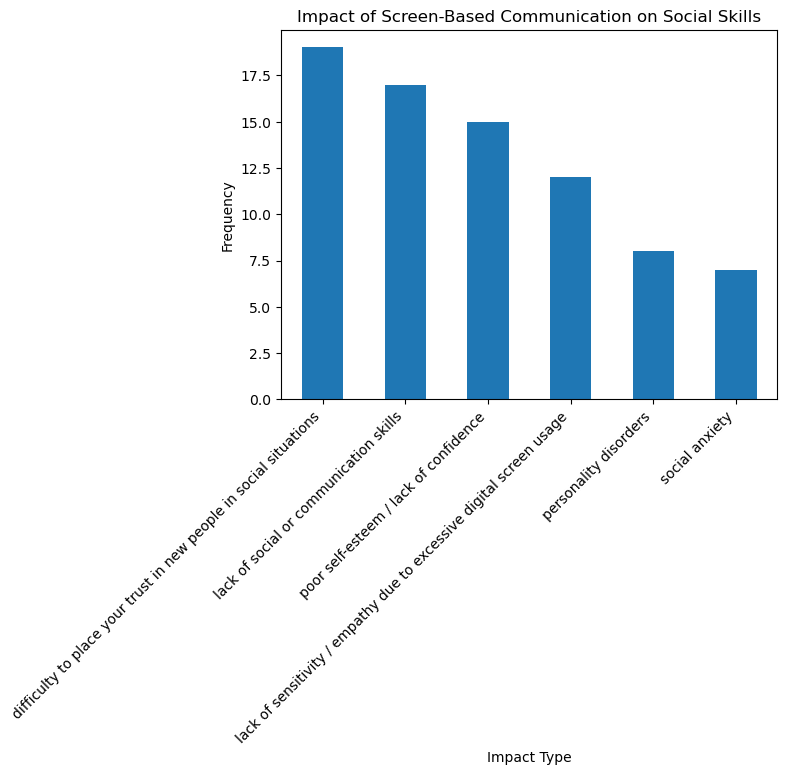

In [47]:
#Impact on social skills(Q8) (multi-select)
social_impact = clean_multiselect(df["social_skill_impact"])
social_impact_exploded = social_impact.explode()

social_impact.value_counts().plot.bar()
plt.title("Impact of Screen-Based Communication on Social Skills")
plt.xlabel("Impact Type")
plt.ylabel("Frequency")
plt.xticks(rotation=45, ha="right")
plt.show()

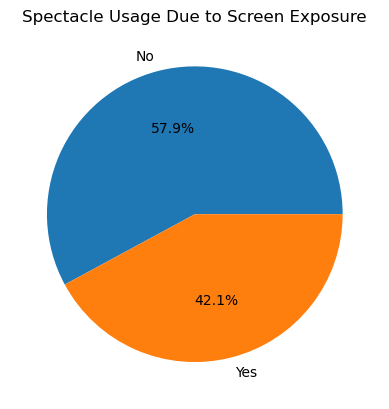

In [32]:
#Wearing Spectacles(Q9)
df["wear_spectacles"].value_counts().plot.pie(autopct="%1.1f%%")
plt.title("Spectacle Usage Due to Screen Exposure")
plt.ylabel("")
plt.show()

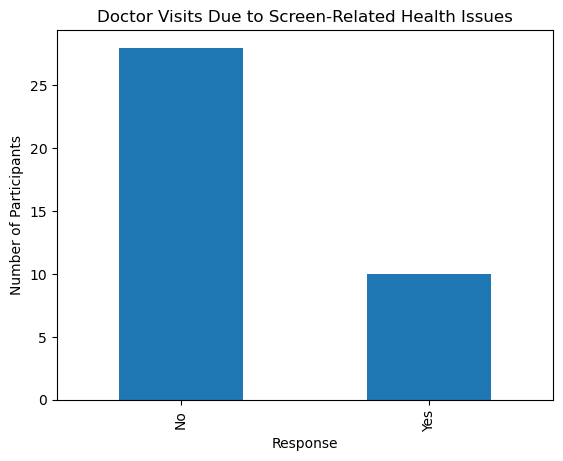

In [33]:
#Doctor visits due to screen effects(Q10)
df["doctor_visit"].value_counts().plot.bar()
plt.title("Doctor Visits Due to Screen-Related Health Issues")
plt.xlabel("Response")
plt.ylabel("Number of Participants")
plt.show()


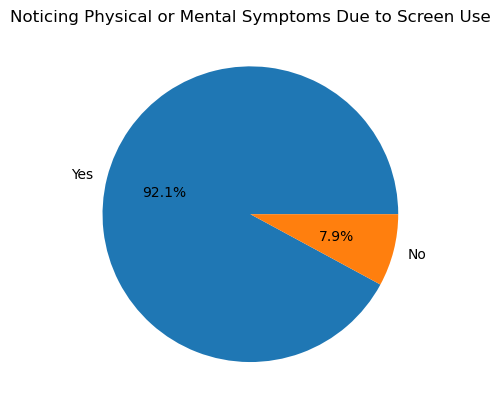

In [34]:
#Noticing Symptoms(Q11)
df["noticed_symptoms"].value_counts().plot.pie(autopct="%1.1f%%")
plt.title("Noticing Physical or Mental Symptoms Due to Screen Use")
plt.ylabel("")
plt.show()


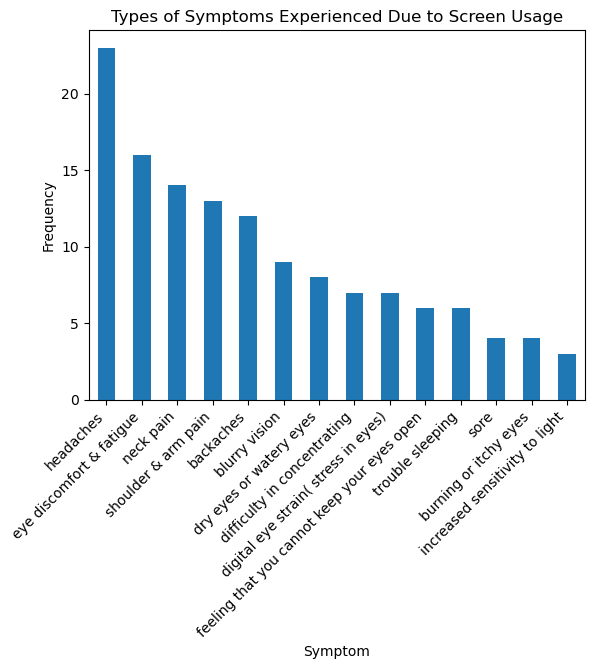

In [49]:
#Types of symptoms(Q12) (multi-select)
symptoms = clean_multiselect(df["symptoms_types"])
symptoms_exploded = symptoms.explode()

symptoms.value_counts().plot.bar()
plt.title("Types of Symptoms Experienced Due to Screen Usage")
plt.xlabel("Symptom")
plt.ylabel("Frequency")
plt.xticks(rotation=45, ha="right")
plt.show()


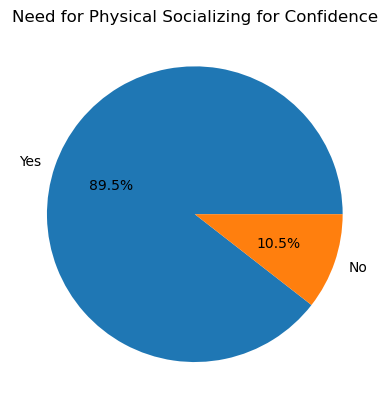

In [36]:
#Need for physical socializing(Q13)
df["need_physical_socializing"].value_counts().plot.pie(autopct="%1.1f%%")
plt.title("Need for Physical Socializing for Confidence")
plt.ylabel("")
plt.show()

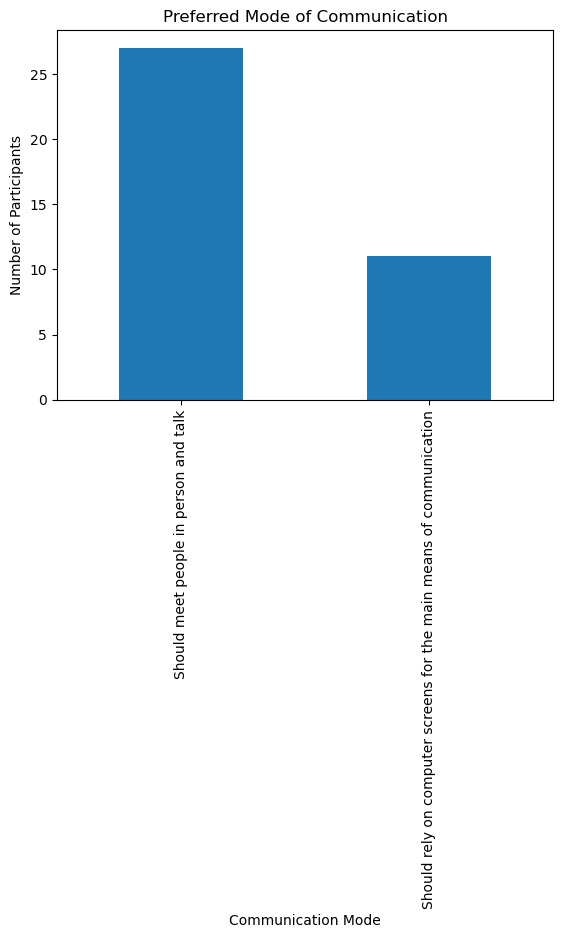

In [50]:
#Preferred communication mode(Q14)
df["preferred_com_mode"].value_counts().plot.bar()
plt.title("Preferred Mode of Communication")
plt.xlabel("Communication Mode")
plt.ylabel("Number of Participants")
plt.show()

In [42]:
#Qualitative responses(Q15) - Not a plot(important)   #Open-ended responses
df["reason_for_preference"].head(38)

0                                  I think both can get
1                                                     .
2     It's better to meet people and communicate wit...
3     Communicating with people through face to face...
4     Well, I think that they both should go hand to...
5     Though we use computer to communicate as it's ...
6           It's better for communication with others\n
7                                      Congratulations 
8     We can communicate our true feelings and emoti...
9     It gives us to share our opinions freely and well
10                                             Nothing 
11    Online communication is good because we can co...
12                                                    -
13    I think we have to be simple and go away from ...
14    It is very easy to communicate with the people...
15    Unless it is difficult to trust & understand p...
16    If we continue communication via computer scre...
17                                              